In [68]:
import numpy
import pandas
import nltk
import string
import re
import inflect
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize,WhitespaceTokenizer
nltk.download('stopwords')
nltk.download('punkt')
from nltk.stem import PorterStemmer
stem1=PorterStemmer()
from nltk.stem import wordnet
lemma=wordnet.WordNetLemmatizer()
nltk.download('wordnet')
from nltk import pos_tag
nltk.download('averaged_perceptron_tagger')
from nltk import ne_chunk
nltk.download('maxent_ne_chunker')
nltk.download('words')
from nltk.tokenize.regexp import WordPunctTokenizer
from nltk.tokenize import sent_tokenize
from nltk import FreqDist

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!


In [8]:
#Python String
a='data'
print(a)

#Strings as Arrays
a='Dataset'
print(a[3])

#Slicing in String
print(a[3:6],a[-6:-2])

#String Methods
print(a.lower(),a.upper(),a.split('a'),a.replace('a','r'))

#String Concatination
b='Training'
print(a+' '+b)

data
a
ase atas
dataset DATASET ['D', 't', 'set'] Drtrset
Dataset Training


In [13]:
#Creating a Text File
f=open('practice.txt','w+')
for i in range(3):
  f.write('This is line %d\n'%(i+1))
f.close()

#Apending in File
f=open('practice.txt','a+')
for i in range(3):
  f.write('New line %d\n'%(i+1))
f.close()

#Reading the File
f=open('practice.txt','r+')
print(f.read())
print('Complete')
f.close()

This is line 1
This is line 2
This is line 3
New line 1
New line 2
New line 3

Complete


In [25]:
#Converting text to lowercase
def lowercase(inp):
  return inp.lower()
inp_str="Data-Science 123, is 4 an Awesome field. 221"
print(lowercase(inp_str))

#Removing numbers
def rem_no(inp):
  result=re.sub(r'\d',' ',inp)
  return result
print(rem_no(inp_str))

#Convert number to words
def num2word(inp):
  res=[]
  for i in inp.split():
    if i.isdigit():
      w=inflect.engine().number_to_words(int(i))
      res.append(w)
    else:
      res.append(i)
  return ' '.join(res)
print(num2word(inp_str))

#Remove Puctuations
def rem_punc(inp):
  t=str.maketrans('','',string.punctuation)
  return inp.translate(t)
print(rem_punc(inp_str))

#Remove Stopwords
def rem_sword(inp):
  sword=stopwords.words('english')
  token=word_tokenize(inp)
  result=[]
  for i in token:
    if i not in sword:
      result.append(i)
  return ' '.join(result)
print(rem_sword(inp_str))

data-science 123, is 4 an awesome field. 221
Data-Science    , is   an Awesome field.    
Data-Science 123, is four an Awesome field. two hundred and twenty-one
DataScience 123 is 4 an Awesome field 221
Data-Science 123 , 4 Awesome field . 221


In [32]:
#Stemming
def stem_words(text):
  word_tokens=word_tokenize(text)
  stem=[stem1.stem(i) for i in word_tokens]
  return(stem)
text="Data is a new revolution in the world, in a day one individual would generate terabytes of data."
print("Stemming Result")
print(stem_words(text))
print('\n')

#Lematization
def lemma_words(text):
  word_tokens=word_tokenize(text)
  l=[lemma.lemmatize(i) for i in word_tokens]
  return(l)
print("Lemmatization Result")
print(lemma_words(text))

Stemming Result
['data', 'is', 'a', 'new', 'revolut', 'in', 'the', 'world', ',', 'in', 'a', 'day', 'one', 'individu', 'would', 'gener', 'terabyt', 'of', 'data', '.']


Lemmatization Result
['Data', 'is', 'a', 'new', 'revolution', 'in', 'the', 'world', ',', 'in', 'a', 'day', 'one', 'individual', 'would', 'generate', 'terabyte', 'of', 'data', '.']


In [38]:
#Parts of speech tagging
def pos_tagging(text):
  word_token=word_tokenize(text)
  return (pos_tag(word_token))
print(pos_tagging('Are you afraid of something?'))

#Chunking
def chunking(text,grammer):
  word_token=word_tokenize(text)
  word_pos=pos_tag(word_token)
  chunk_parser=nltk.RegexpParser(grammer)
  tree=chunk_parser.parse(word_pos)
  for i in tree.subtrees():
    print(i)
sentence='the little red parrot is flying in the sky'
grammer="NP:{<DT>?<JJ>*<NN>}"
print(chunking(sentence,grammer))

#Name entity recognition
def ner(text):
  word_token=word_tokenize(text)
  word_pos=pos_tag(word_token)
  print(ne_chunk(word_pos))
text='Brain Lara scored the highest 400 runs in a Test match which was played between West Indies and England in 2017.'
ner(text)

[('Are', 'NNP'), ('you', 'PRP'), ('afraid', 'IN'), ('of', 'IN'), ('something', 'NN'), ('?', '.')]
(S
  (NP the/DT little/JJ red/JJ parrot/NN)
  is/VBZ
  flying/VBG
  in/IN
  (NP the/DT sky/NN))
(NP the/DT little/JJ red/JJ parrot/NN)
(NP the/DT sky/NN)
None
(S
  (PERSON Brain/NNP)
  (PERSON Lara/NNP)
  scored/VBD
  the/DT
  highest/JJS
  400/CD
  runs/NNS
  in/IN
  a/DT
  (GPE Test/NNP)
  match/NN
  which/WDT
  was/VBD
  played/VBN
  between/IN
  (GPE West/NNP Indies/NNPS)
  and/CC
  (GPE England/NNP)
  in/IN
  2017/CD
  ./.)


In [39]:
#Regular Expressions
sent = "dataset, Data is a new fuel"
r2 = re.findall(r"^\w+", sent)
print(r2)
r3=re.findall(r'^\w',sent)
print(r3)

#\s expression in re.split
print((re.split(r'\s','we splitted this sentence')))
print((re.split(r's','we splitted this sentence')))

#using re.match
lst=['icecream images','i immitated','inner peace']
for i in lst:
  a=re.match("(i\w+)\W(i\w+)",i)
  if a:
    print((a.groups()))

#finding pattern in the text(re.search)
pattern=["playing","dataset"]
text="Raju is playing outside"
for p in pattern:
  print("you are looking for '{}' in '{}'".format(p,text),end='  ')
  if re.search(p,text):
    print("Found a match!")
  else:
    print("No match")

#using re.findall
x="abc@gmail.com,xyz@gmail.com,lmn@gmail.com,efg@gmail.com"
y=re.findall(r'[\w\.-]+@[\w\.-]+',x)
for i in y:
  print(i)

['dataset']
['d']
['we', 'splitted', 'this', 'sentence']
['we ', 'plitted thi', ' ', 'entence']
('icecream', 'images')
you are looking for 'playing' in 'Raju is playing outside'  Found a match!
you are looking for 'dataset' in 'Raju is playing outside'  No match
abc@gmail.com
xyz@gmail.com
lmn@gmail.com
efg@gmail.com


In [72]:
#Text Normalization
#Tokenization
text="Founded in 2002, SpaceX's mission is to enable humans to become a spacefaring civilization and a multi-planet species by building a self-sustaining city on Mars. In 2008, SpaceX's Falcon 1 became the first privately developed liquid-fuel launch vehicle to orbit the Earth."
word_tokenize(text)

['Founded',
 'in',
 '2002',
 ',',
 'SpaceX',
 "'s",
 'mission',
 'is',
 'to',
 'enable',
 'humans',
 'to',
 'become',
 'a',
 'spacefaring',
 'civilization',
 'and',
 'a',
 'multi-planet',
 'species',
 'by',
 'building',
 'a',
 'self-sustaining',
 'city',
 'on',
 'Mars',
 '.',
 'In',
 '2008',
 ',',
 'SpaceX',
 "'s",
 'Falcon',
 '1',
 'became',
 'the',
 'first',
 'privately',
 'developed',
 'liquid-fuel',
 'launch',
 'vehicle',
 'to',
 'orbit',
 'the',
 'Earth',
 '.']

In [53]:
tokens = WhitespaceTokenizer().tokenize(text)
print(len(tokens))
print(tokens)
print(len(set(tokens)))


42
['Founded', 'in', '2002,', "SpaceX's", 'mission', 'is', 'to', 'enable', 'humans', 'to', 'become', 'a', 'spacefaring', 'civilization', 'and', 'a', 'multi-planet', 'species', 'by', 'building', 'a', 'self-sustaining', 'city', 'on', 'Mars.', 'In', '2008,', "SpaceX's", 'Falcon', '1', 'became', 'the', 'first', 'privately', 'developed', 'liquid-fuel', 'launch', 'vehicle', 'to', 'orbit', 'the', 'Earth.']
36


In [59]:
my_st="There is no need to panic. We need to work together, take small yet important measures to ensure"
m_t= WordPunctTokenizer().tokenize(my_st)
print(len(m_t))
print(m_t)

20
['There', 'is', 'no', 'need', 'to', 'panic', '.', 'We', 'need', 'to', 'work', 'together', ',', 'take', 'small', 'yet', 'important', 'measures', 'to', 'ensure']


In [57]:
text = """Founded in 2002, SpaceX's mission is to enable humans to become a spacefaring civilization and a multi-planetary species by building a self-sustaining city on Mars. In 2008, SpaceX's Falcon 1 became the first privately developed liquid-fuel launch vehicle to orbit the Earth."""
sent_tokenize(text)

["Founded in 2002, SpaceX's mission is to enable humans to become a spacefaring civilization and a multi-planetary species by building a self-sustaining city on Mars.",
 "In 2008, SpaceX's Falcon 1 became the first privately developed liquid-fuel launch vehicle to orbit the Earth."]

In [71]:
#Frequency Distribution Plot
freqDist = nltk. FreqDist(word_tokenize(my_st))
print(freqDist)

<FreqDist with 17 samples and 20 outcomes>


In [63]:
words = freqDist.keys()
print(type(words))
print(words)

<class 'dict_keys'>
dict_keys(['There', 'is', 'no', 'need', 'to', 'panic', '.', 'We', 'work', 'together', ',', 'take', 'small', 'yet', 'important', 'measures', 'ensure'])


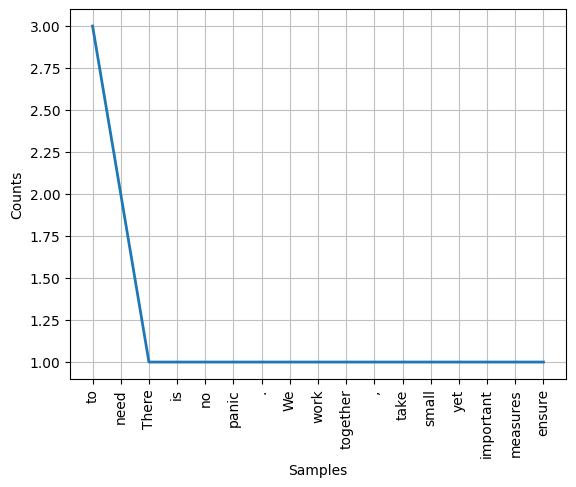

<Axes: xlabel='Samples', ylabel='Counts'>

In [65]:
freqDist.plot()

1


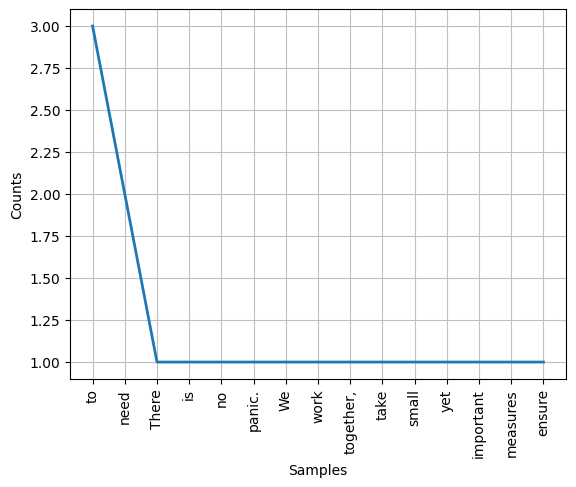

<Axes: xlabel='Samples', ylabel='Counts'>

In [70]:
text_list=my_st.split(" ")
freq_dist=FreqDist(text_list)
words=list(freq_dist.keys())
print(freq_dist['work'])
freq_dist.plot()